<table style="border:1px solid gray">
    <thead style="border:1px solid gray">
        <tr>
            <th>index</th>
            <th>df명</th>
            <th>설명</th>
            <th>비교</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0</td>
            <td>df0_base</td>
            <td>최소한의 전처리만 진행</td>
            <td>다른 dataframe 검증할 때 비교</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Date</b></td>
        </tr>
        <tr>
            <td>1</td>
            <td>df1_date</td>
            <td>날짜 데이터 포함</td>
            <td rowspan=3>df0_base, df1_date, df3_date 비교 후,<br>데이터 추가 후 df2_date와 비교</td>
        </tr>
        <tr>
            <td>2</td>
            <td>df2_date</td>
            <td>날짜 데이터 제거</td>
        </tr>
        <tr>
            <td>3</td>
            <td>df3_date</td>
            <td>날짜 데이터 one hot encoding</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding columns</b></td>
        </tr>
        <tr>
            <td>4</td>
            <td>df4_name</td>
            <td>어종별 수 컬럼 추가</td>
            <td rowspan=2>df0_base<br>df4_name<br>df5_import</td>
        </tr>
        <tr>
            <td>5</td>
            <td>df5_import</td>
            <td>수입용도 수 컬럼 추가</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Dropping Columns</b></td>
        </tr>
        <tr>
            <td>6</td>
            <td>df6_caegory</td>
            <td>CATEGORY_2, P_NAME 컬럼 제거</td>
            <td rowspan=2>df0_base<br>df6_category<br>df7_category</td>
        </tr>
        <tr>
            <td>7</td>
            <td>df7_category</td>
            <td>CATEGORY_1, CATEGORY_2 컬럼 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding Data</b></td>
        </tr>
        <tr>
            <td>8</td>
            <td>df8_add</td>
            <td>제조국 날씨, 한국 날씨, 원유 종가, 염도, 소비자물가지수 data 추가</td>
            <td>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Normalization</b></td>
        </tr>
        <tr>
            <td>9</td>
            <td>df9_add</td>
            <td>numerical feature 에 대한 정규화 진행</td>
            <td>df0_base<br>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Filling Missing Values</b></td>
        </tr>
        <tr>
            <td>10</td>
            <td>df10_fillna</td>
            <td>fillna(method=ffill)로 날씨 결측치 처리</td>
            <td rowspan=2>df0_base<br>df10_fillna<br>df11_fillna</td>
        </tr>
        <tr>
            <td>11</td>
            <td>df11_fillna</td>
            <td>fillna(method=bfill)로 날씨 결측치 처리</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Processing Outliers</b></td>
        </tr>
        <tr>
            <td>12</td>
            <td>df12_outlier</td>
            <td>전체 날씨 데이터 정규화 후 outlier 일괄 제거</td>
            <td rowspan=2>df0_base<br>df12_outlier<br>df13_outlier</td>
        </tr>
        <tr>
            <td>13</td>
            <td>df13_outlier</td>
            <td>나라별로 최저/최고 기온 파악 후 outlier 개별 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Grouping</b></td>
        </tr>
        <tr>
            <td>13</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>

# 전처리 가설 검증
- df_train + 추가데이터 전부 사용  
- 5개 나라에 대해서만 진행('칠레', '중국', '노르웨이', '태국', '베트남') > ctry_list 변수에 포함되어 있음

# 모델 3개 만들어보기 (오징어,연어,흰다리새우)

# Setting

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
from datetime import date, timedelta


def set_week(df, date):
    '''
    df : datetime 형식의 컬럼을 가지고 있는 dataframe
    date : df에서 datetime 형식을 가진 컬럼명
    return : date의 연도 컬럼과 주차 컬럼을 추가한 dataframe
    '''
    df[date] = pd.to_datetime(df[date])
    df[date] = df[date].dt.date
    df['year'] = df.apply(func=lambda x: x[date].isocalendar()[0], axis=1)
    df['week'] = df.apply(func=lambda x: x[date].isocalendar()[1], axis=1)
    df.drop(date, axis=1, inplace=True)
    

def check_week(df):
    '''
    df에 date가 전부 있는지 확인
    '''
    cnt = 0
    sdate = date(2015, 12, 28)   # start date
    edate = date(2019, 12, 30)   # end date
    delta = edate - sdate       # as timedelta
    mem = set()
    
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        year, week = day.isocalendar()[0], day.isocalendar()[1]
        if year * 100 + week in mem:
          continue
        mem.add(year * 100 + week)
        if df[(df['year'] == year) & (df['week'] == week)].empty:
          print((year, week), end="")
          cnt += 1
    if cnt > 0:
        print()
    print("missing", cnt, "values")    

In [3]:
def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5


def train_model(train_data, target_data, model=LinearRegression()):  # baseline model : LInearRegression
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, random_state=0)

    model.fit(x_train, y_train)
    print("Model Training Complete!")

    pred_train, pred_test = model.predict(x_train), model.predict(x_test)
    
    plt.figure(figsize=(10, 8))
#     plt.scatter(pred_train, y_train, s=10)
    sns.regplot(pred_train, y_train, color='g')
    plt.xlabel("Predicted price")
    plt.ylabel("Actual price")
    plt.show()

    # cvs = cross_val_score(model, x_test, y_test, cv = 5)
    # print(">> cross_val_score mean =", cvs.mean())
    print(">> RMSE train =", RMSE(y_train, pred_train))
    print(">> RMSE validation =", RMSE(y_test, pred_test))
    print(">> MAE train =", mean_absolute_error(pred_train, y_train))
    print(">> MAE validation =", mean_absolute_error(pred_test, y_test))
    print("-------------------------------------------------")
    
    return model

    
def print_importance(model, df, added_columns):
    importance = model.coef_
    fs_data = []
    for i, x in enumerate(importance):
        fs_data.append([abs(x), df.columns[i]])
    fs_data.sort(key=lambda x: x[0], reverse=True)
   
    # 추가한 컬럼의 중요도
    for i in range(len(fs_data)):
        if fs_data[i][1] in added_columns:
            print(fs_data[i][1], ":", fs_data[i][0] ,">", i, "순위")
    print("-------------------------------------------------")
    print("총", len(fs_data) , "개")
    
    return fs_data

In [4]:
root = os.path.join(os.getcwd(), 'DATA')

In [5]:
ctry_list = ['칠레', '중국', '노르웨이', '태국', '베트남']  # 사용할 나라 목록

# Import Data

In [6]:
df_train = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_weather_code = pd.read_csv(os.path.join(root, 'raw_weather_code.csv'), header=None, index_col=0)
weather_list = [pd.read_csv(os.path.join(root, 'raw_weather_20151228_20161227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20161228_20171227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20171228_20181227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20181228_20191227.csv'), encoding='cp949') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20191228_20201227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20201228_20210818.csv'), encoding='euc-kr')]

In [7]:
df_oil = pd.read_csv(os.path.join(root, 'preprocessed_oil.csv'))
df_weather = pd.read_csv(os.path.join(root, 'preprocessed_weather.csv'))
df_weather_kr = pd.read_csv(os.path.join(root, 'preprocessed_weather_korea.csv'))
df_cpi = pd.read_csv(os.path.join(root, 'preprocessed_cpi.csv'))
df_exchange = pd.read_csv(os.path.join(root, 'preprocessed_exchange.csv'))

제조국 날씨의 경우 결측치 처리 과정이 필요하기 때문에 raw data를 가져온다

# df_train

In [8]:
df_train

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340
...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967


In [9]:
df_train.drop('P_TYPE',axis=1,inplace=True)

# df0_base

## preprocessing

In [10]:
# df_train_copy = df_train_main.copy()

# set_week(df_train_copy, 'REG_DATE')

# check_week(df_train_copy) # 2017년 2주차에 결측치 존재

In [11]:
df0_base = df_train.copy()

df0_base = df0_base.replace([np.datetime64('2017-01-01'), np.datetime64('2017-01-06')],
                            [np.datetime64('2017-01-02'), np.datetime64('2017-01-09')]) # 결측치 제거를 위해 2017/01/01 -> 2017/01/06 , 2017/01/02 -> 2017/01/09 값 대치

import_type_list = set()
for tmp in df0_base.P_IMPORT_TYPE.unique():
    for a in tmp.split(','):
        import_type_list.add(a)

In [12]:
for name in import_type_list:
    df0_base[name] = 0
    df0_base.loc[df0_base['P_IMPORT_TYPE'].str.contains(name, regex=False), name] = 1

In [13]:
set_week(df0_base, 'REG_DATE')

In [14]:
check_week(df0_base) # 결측치 제거 완료

missing 0 values


## Encoding

In [15]:
df0_base.drop('P_IMPORT_TYPE',axis=1,inplace=True)

df0_base_encoding = pd.get_dummies(df0_base,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df0_base_encoding

,P_PRICE,머리살,절단,눈살,동체,개아지살,냉동,건조,살,포장횟감,알,지느러미,창난,목살,외투막,냉장,볼살,다리,훈제,곤이,내장,슬라이스(S),자숙,머리,간,머리_외화획득용,집게다리,턱살,캐비아대용,필렛(F),활,한쪽껍질붙은,염장,껍질,난포선,줄기,횟감,꼬리_외화획득용,year,week,...,P_NAME_코드아이스피쉬,P_NAME_코토니,P_NAME_쿠자조기,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_큰실말,P_NAME_큰징거미새우,P_NAME_키조개,P_NAME_태평양먹장어,P_NAME_털게,P_NAME_톱날꽃게,P_NAME_톳,P_NAME_틸라피아,P_NAME_파타고니아이빨고기,P_NAME_프로펠러조개,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍감펭,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍서대,P_NAME_홍어,"P_NAME_홍연어,Red salmon",P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황돔,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_회초리꼬리민태,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흑점샛돔알,P_NAME_흑점줄전갱이,P_NAME_흰꼴뚜기,P_NAME_흰다리새우
0,7.480000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.920000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.356352,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18.260870,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.791340,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,38.437099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42070,23.396192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


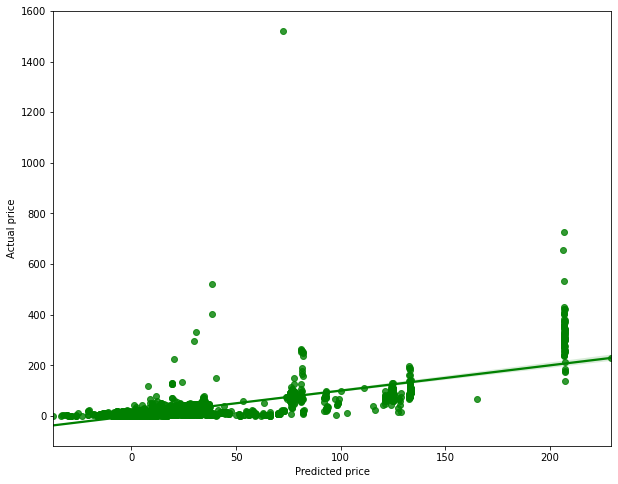

>> RMSE train = 14.252151759317726
>> RMSE validation = 608991290.6373142
>> MAE train = 4.178656903246011
>> MAE validation = 21353726.54213322
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
x_features = df0_base_encoding.iloc[:,1:]
y_target = df0_base_encoding['P_PRICE']

train_model(x_features,y_target)

Model Training Complete!


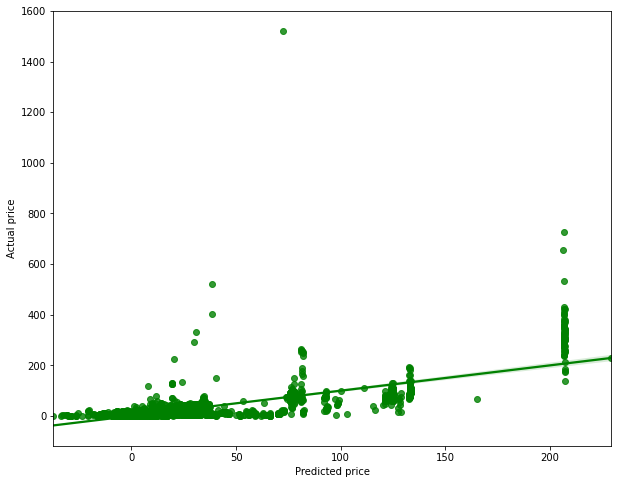

>> RMSE train = 14.252151759317726
>> RMSE validation = 608991290.6373142
>> MAE train = 4.178656903246011
>> MAE validation = 21353726.54213322
-------------------------------------------------
-------------------------------------------------
총 625 개


In [17]:
# plot feature importance
model0 = train_model(x_features,y_target)
features = print_importance(model0, df0_base_encoding, [])

# df_squid

In [18]:
df_squid = df0_base[(df0_base['P_NAME']=='오징어') & ((df0_base['CTRY_2']=='페루') | (df0_base['CTRY_2']=='중국') | (df0_base['CTRY_2']=='칠레'))]

df_squid = df_squid[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_squid

,CTRY_1,CTRY_2,P_PRICE,year,week
94,중국,중국,0.793729,2015,53
119,페루,페루,1.233434,2015,53
143,페루,페루,5.481140,2015,53
160,칠레,칠레,0.968083,2015,53
166,칠레,칠레,0.762758,2015,53
...,...,...,...,...,...
42016,칠레,칠레,2.247963,2020,1
42021,페루,페루,5.269235,2020,1
42027,페루,페루,1.760060,2020,1
42045,페루,페루,2.281843,2020,1


## Merge Features

In [19]:
df_squid_add = pd.merge(df_squid, df_weather_kr, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_squid_add = pd.merge(df_squid_add, df_oil, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_cpi, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_squid_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,중국,중국,0.793729,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541
1,중국,중국,0.793729,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541
2,페루,페루,1.233434,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.22,101.26,0.2943
3,페루,페루,1.233434,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.39,100.76,0.2943
4,페루,페루,5.481140,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.22,101.26,0.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,페루,페루,1.760060,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.79,118.44,0.3013
2379,페루,페루,2.281843,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.12,116.99,0.3013
2380,페루,페루,2.281843,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.79,118.44,0.3013
2381,중국,중국,4.108244,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.12,116.99,0.1431


In [20]:
df_squid_add = df_squid_add.sort_values('CTRY_2')

## Filling Missing Value

In [21]:
df_squid_add.isna().sum() # 페루 날씨 데이터 결측값 존재

CTRY_1               0
CTRY_2               0
P_PRICE              0
year                 0
week                 0
wind_kr              0
temperature_kr       0
water_temp_kr        0
rain              1055
wind              1055
temperature       1055
oil                  0
cpi_total            0
cpi_fish             0
exchange             0
dtype: int64

In [22]:
df_squid_add.fillna(method='ffill',inplace=True)  # 가까운 나라인 칠레 데이터로 대체

In [23]:
df_squid_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [24]:
df_squid_add = df_squid_add.groupby(['year','week']).mean()

df_squid_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                      ...                               
2015 53    1.700255  5.352941        7.973109  ...    100.305   101.010  0.124483
2016 1     1.787152  6.739496        6.356303  ...    100.390   100.760  0.183650
     2     1.345855  6.095798        5.514286  ...    100.390   100.760  0.147314
     3     1.756002  9.819643        0.268750  ...    100.390   100.760  0.163711
     4     2.522180  7.211224        4.908163  ...    100.390   100.760  0.231240
...             ...       ...             ...  ...        ...       ...       ...
2019 49    2.376248  7.260150        7.243609  ...    105.120   116.990  0.176173
     50    2.886105  6.208276       10.433793  ...    105.120   116.990  0.186499
     51    2.554381  6.806122        9.477551  ...    105.120   116.990  0.145980
     52    4.346584  6.362585        8.774830  ...    105.120   116.990  0.136179
2020 1     2.970531  6.534266        6.942657  ...    105.455   117.715  0.183398

[208 rows x 11 columns]

### Result

Model Training Complete!


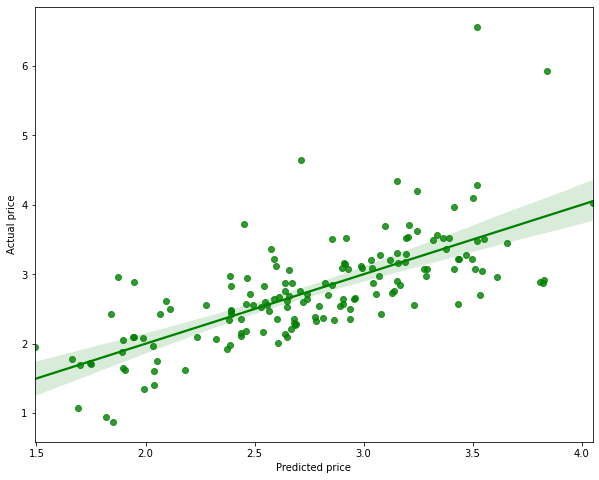

>> RMSE train = 0.5419168757121906
>> RMSE validation = 0.5147194124147247
>> MAE train = 0.37397735500082563
>> MAE validation = 0.3898312961084412
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
x_features = df_squid_add.drop('P_PRICE',axis=1)
y_target = df_squid_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

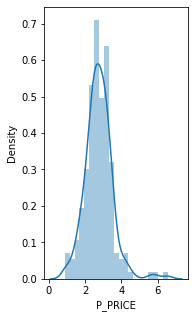

In [26]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'P_PRICE':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(151)
    sns.distplot(df_squid_add[i])

데이터 표준화 실시

Model Training Complete!


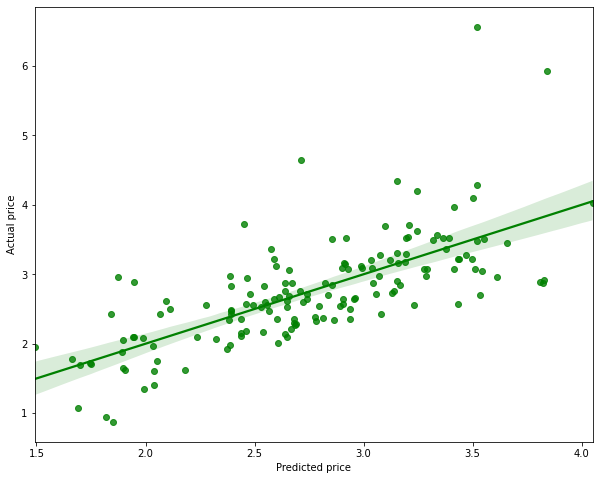

>> RMSE train = 0.5419168757121906
>> RMSE validation = 0.5147194124147243
>> MAE train = 0.37397735500082535
>> MAE validation = 0.3898312961084406
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
x_features = df_squid_add.drop('P_PRICE', axis=1)
y_target = df_squid_add['P_PRICE']

scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

train_model(x_features,y_target)

## Feature Selection

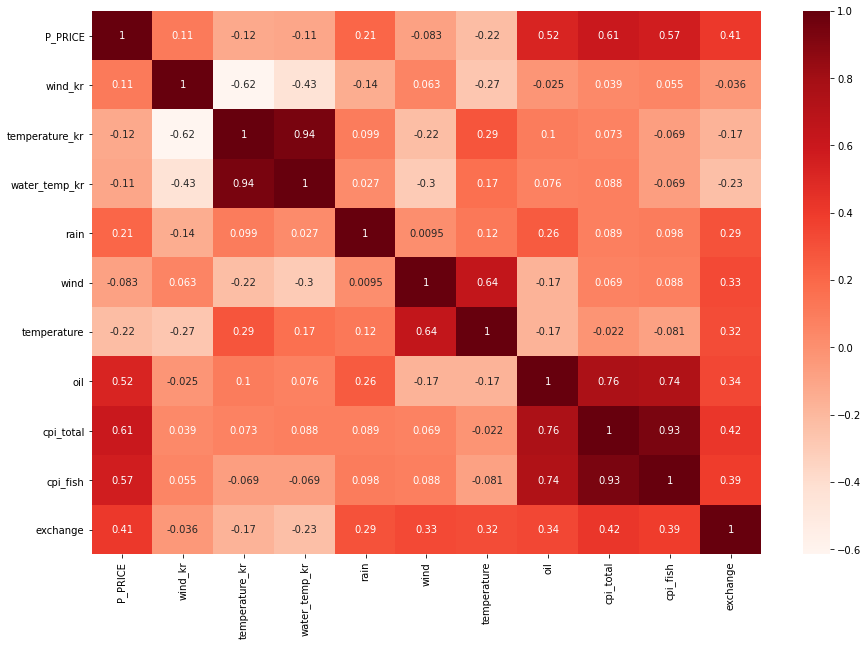

In [28]:
plt.figure(figsize=(15,10))

sns.heatmap(df_squid_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_squid_add.values, i) for i in range(df_squid_add.shape[1])]
vif['features'] = df_squid_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,2.173431,rain
1,6.879067,wind
2,25.672760,P_PRICE
3,33.052561,exchange
4,45.829640,wind_kr
5,49.724703,temperature
6,95.696461,oil
7,98.123608,temperature_kr
8,147.111586,water_temp_kr
9,2872.552657,cpi_total


In [30]:
import statsmodels.api as sm

X = df_squid_add.drop('P_PRICE',axis=1)
y = df_squid_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     20.01
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           2.98e-25
Time:                        10:29:49   Log-Likelihood:                -163.98
No. Observations:                 208   AIC:                             350.0
Df Residuals:                     197   BIC:                             386.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -28.8588      5.844     -4.

상관관계 낮은 변수 재조합하여 다중공선성 제거 및 각 변수들의 p-value 조정 필요

### Add Derived Variable

In [31]:
df_squid_add1 = df_squid_add.copy()

df_squid_add1['cpi'] = df_squid_add1['cpi_fish'] / df_squid_add1['cpi_total']
df_squid_add1['weather_kr'] = (df_squid_add1['water_temp_kr'] + df_squid_add1['temperature_kr'] + df_squid_add1['wind_kr']) / 3
df_squid_add1['weather'] = (df_squid_add1['rain'] + df_squid_add1['temperature'] + df_squid_add1['wind']) / 3
df_squid_add1['oil/exchange'] = (df_squid_add1['oil'] + df_squid_add1['exchange']) / 2

df_squid_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','oil','exchange','wind_kr','rain','wind','temperature'],axis=1,inplace=True)

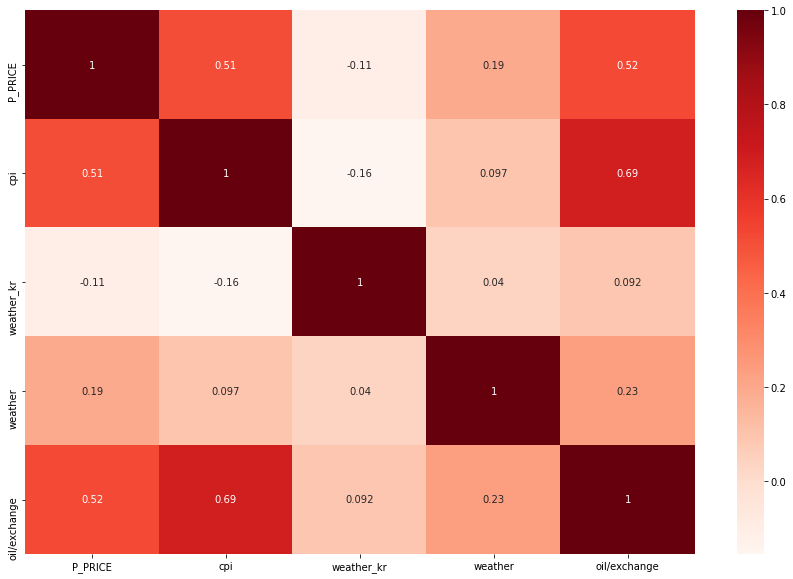

In [32]:
plt.figure(figsize=(15,10))

sns.heatmap(df_squid_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_squid_add1.values, i) for i in range(df_squid_add1.shape[1])]
vif['features'] = df_squid_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,2.367991,weather
1,11.178970,weather_kr
2,20.788938,P_PRICE
3,51.344216,cpi
4,55.290082,oil/exchange


In [34]:
import statsmodels.api as sm

X = df_squid_add1.drop('P_PRICE',axis=1)
y = df_squid_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     25.76
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           2.82e-17
Time:                        10:29:50   Log-Likelihood:                -194.19
No. Observations:                 208   AIC:                             398.4
Df Residuals:                     203   BIC:                             415.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0617      2.185     -2.774   

여전히 다중공선성 존재 및 p-value가 높은 변수들 존재한다는 한계 존재

Model Training Complete!


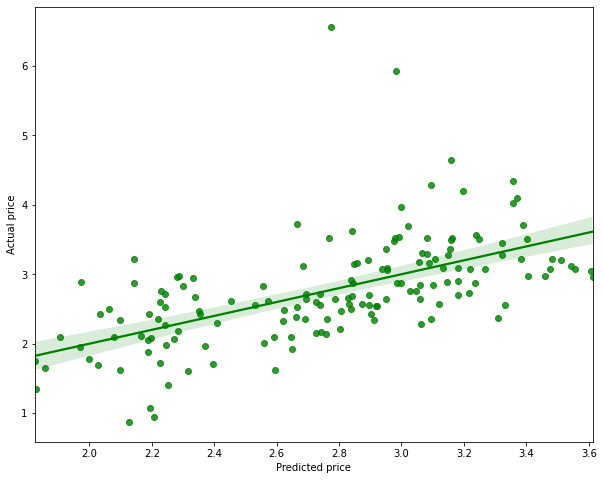

>> RMSE train = 0.6239787544527098
>> RMSE validation = 0.5905069751102244
>> MAE train = 0.4340744105924485
>> MAE validation = 0.39797783534958175
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
x_features = df_squid_add1.drop('P_PRICE', axis=1)
y_target = df_squid_add1['P_PRICE']

train_model(x_features,y_target)

### PCA

In [36]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_squid_add.drop('P_PRICE', axis=1)
y_target = df_squid_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)

In [37]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([9.81804872e-01, 8.70357880e-03, 4.69020921e-03, 3.97096541e-03,
       3.70687515e-04, 2.92132450e-04, 1.26617596e-04, 3.05738022e-05,
       1.03178810e-05, 4.57480439e-08])

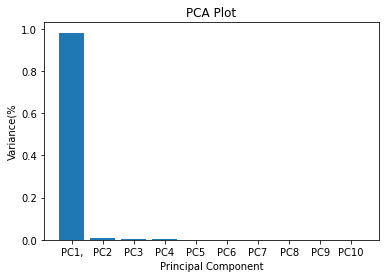

In [38]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


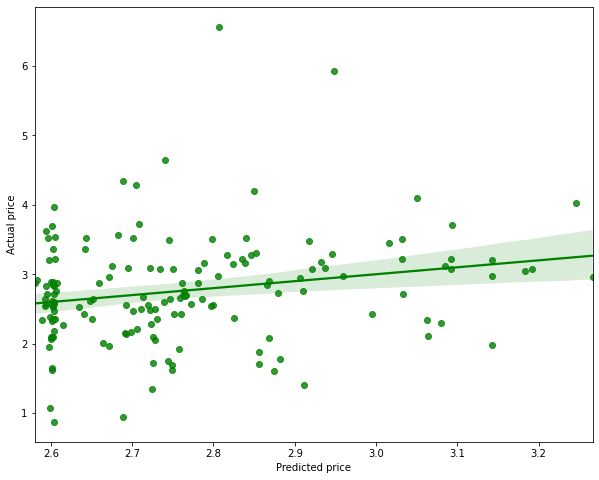

>> RMSE train = 0.7489639384718999
>> RMSE validation = 0.7183893322711181
>> MAE train = 0.5222298296779753
>> MAE validation = 0.5053190399764462
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# 주성분 1개로 분석
x_features = df_squid_add1.drop('P_PRICE', axis=1)
y_target = df_squid_add1['P_PRICE']

pca = PCA(n_components=1)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_squid_add1['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 PCA를 하여도 모델 개선이 되지 않음.

최종모델 : 파생변수 추가 x df_squid_add

## Final Model

Model Training Complete!


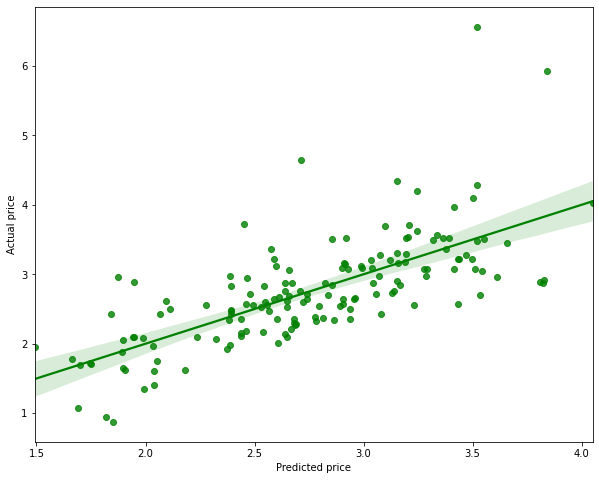

>> RMSE train = 0.5419168757121906
>> RMSE validation = 0.5147194124147247
>> MAE train = 0.37397735500082563
>> MAE validation = 0.3898312961084412
-------------------------------------------------


In [40]:
final_squid = df_squid_add

x_features = final_squid.drop('P_PRICE', axis=1)
y_target = final_squid['P_PRICE']


final_model_squid = train_model(x_features,y_target)

# df_salmon

In [42]:
df_salmon = df0_base[(df0_base['P_NAME']=='연어') & (df0_base['CTRY_2']=='노르웨이') ]

df_salmon = df_salmon[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_salmon

,CTRY_1,CTRY_2,P_PRICE,year,week
74,노르웨이,노르웨이,12.936815,2015,53
129,노르웨이,노르웨이,19.146755,2015,53
168,노르웨이,노르웨이,12.082384,2015,53
174,노르웨이,노르웨이,13.425826,2015,53
198,노르웨이,노르웨이,8.844281,2015,53
...,...,...,...,...,...
41994,노르웨이,노르웨이,16.495971,2020,1
41995,노르웨이,노르웨이,18.350634,2020,1
42044,노르웨이,노르웨이,11.128269,2020,1
42056,노르웨이,노르웨이,15.631531,2020,1


## Merge Features

In [43]:
df_salmon_add = pd.merge(df_salmon, df_weather_kr, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_salmon_add = pd.merge(df_salmon_add, df_oil, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_cpi, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_salmon_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,노르웨이,노르웨이,12.936815,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
1,노르웨이,노르웨이,12.936815,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.39,100.76,0.1149
2,노르웨이,노르웨이,19.146755,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
3,노르웨이,노르웨이,19.146755,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.39,100.76,0.1149
4,노르웨이,노르웨이,12.082384,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,노르웨이,노르웨이,11.128269,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.79,118.44,0.1134
1560,노르웨이,노르웨이,15.631531,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134
1561,노르웨이,노르웨이,15.631531,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.79,118.44,0.1134
1562,노르웨이,노르웨이,13.205675,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134


## Filling Missing Value

In [44]:
df_salmon_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [45]:
df_salmon_add = df_salmon_add.groupby(['year','week']).mean()

df_salmon_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2015 53    13.287212  5.352941        7.973109  ...    100.305   101.010    0.1149
2016 1     12.853869  6.739496        6.356303  ...    100.390   100.760    0.1126
     2     12.876513  6.095798        5.514286  ...    100.390   100.760    0.1119
     3     13.387350  9.819643        0.268750  ...    100.390   100.760    0.1124
     4     12.644323  7.211224        4.908163  ...    100.390   100.760    0.1142
...              ...       ...             ...  ...        ...       ...       ...
2019 49    14.950249  7.260150        7.243609  ...    105.120   116.990    0.1091
     50    16.568750  6.208276       10.433793  ...    105.120   116.990    0.1093
     51    17.718908  6.806122        9.477551  ...    105.120   116.990    0.1110
     52    17.016213  6.362585        8.774830  ...    105.120   116.990    0.1116
2020 1     17.483831  6.534266        6.942657  ...    105.455   117.715    0.1134

[210 rows x 11 columns]

### Result

Model Training Complete!


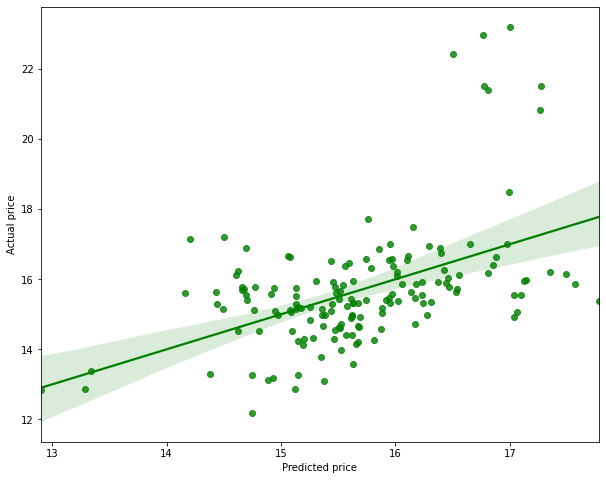

>> RMSE train = 1.4955606735721279
>> RMSE validation = 1.7255058340690708
>> MAE train = 1.0314734759254187
>> MAE validation = 1.2807946372890722
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
x_features = df_salmon_add.drop('P_PRICE',axis=1)
y_target = df_salmon_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

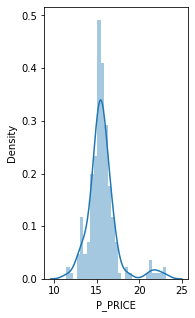

In [47]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'P_PRICE':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(151)
    sns.distplot(df_salmon_add[i])

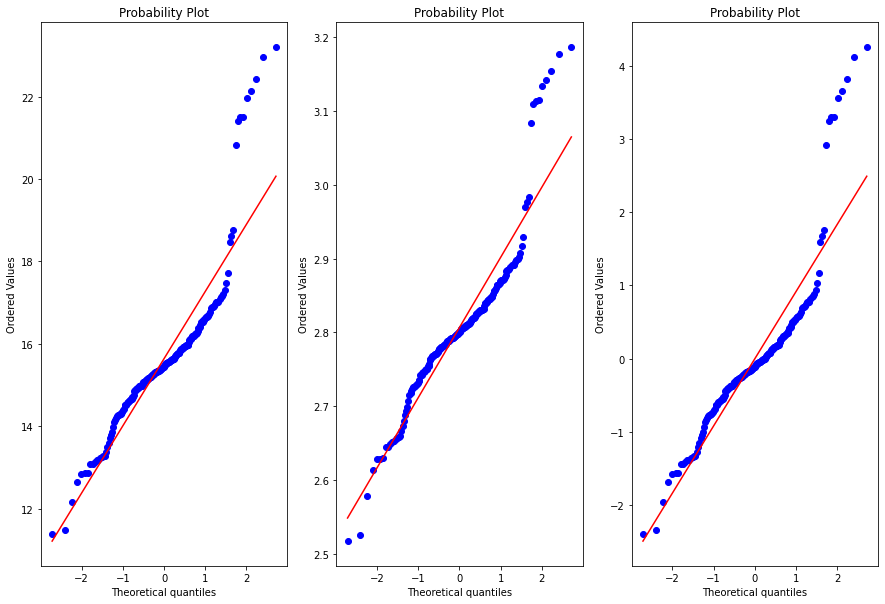

In [48]:
from scipy import stats 

fig = plt.figure(figsize = (15,10))

for i in columns:

  if i == 'P_PRICE':
    fig.add_subplot(131) 
    stats.probplot(df_salmon_add[i],dist=stats.norm , plot=plt) 
    
    df_copy = df_salmon_add.copy()
    df_copy[i] = np.log1p(df_copy[i])
    fig.add_subplot(132) 
    stats.probplot(df_copy[i], dist=stats.norm, plot=plt)
    
    df_copy1 = df_salmon_add.copy()
    df_copy1[i] = (df_copy1[i] - df_copy1[i].mean()) / df_copy1[i].std()
    fig.add_subplot(133) 
    stats.probplot(df_copy1[i], dist=stats.norm, plot=plt)

데이터 표준화 실시

Model Training Complete!


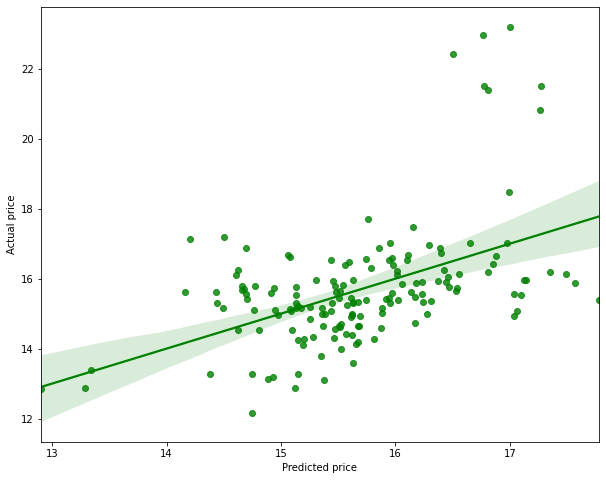

>> RMSE train = 1.4955606735721279
>> RMSE validation = 1.7255058340690739
>> MAE train = 1.0314734759254192
>> MAE validation = 1.2807946372890726
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

train_model(x_features,y_target)

## Feature Selection

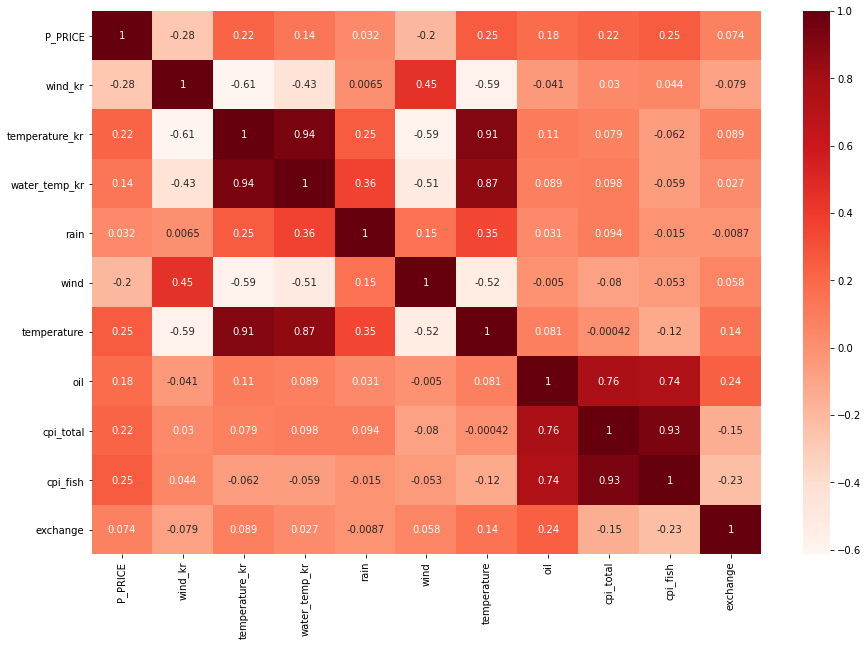

In [50]:
plt.figure(figsize=(15,10))

sns.heatmap(df_salmon_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_salmon_add.values, i) for i in range(df_salmon_add.shape[1])]
vif['features'] = df_salmon_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,11.619903,temperature
1,15.010068,rain
2,45.291804,wind_kr
3,46.358892,wind
4,102.870942,temperature_kr
5,103.233396,P_PRICE
6,112.780228,oil
7,153.401376,water_temp_kr
8,1021.283562,exchange
9,6613.625063,cpi_fish


In [52]:
import statsmodels.api as sm

X = df_salmon_add.drop('P_PRICE',axis=1)
y = df_salmon_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     6.126
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           3.99e-08
Time:                        10:29:55   Log-Likelihood:                -389.91
No. Observations:                 210   AIC:                             801.8
Df Residuals:                     199   BIC:                             838.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1185     16.797      0.

상관관계 낮은 변수 재조합하여 다중공선성 제거 및 각 변수들의 p-value 조정 필요

### Add Derived Variable

In [53]:
df_salmon_add1 = df_salmon_add.copy()

df_salmon_add1['cpi'] = df_salmon_add1['cpi_fish'] / df_salmon_add1['cpi_total']
df_salmon_add1['weather_kr'] = (df_salmon_add1['water_temp_kr'] + df_salmon_add1['temperature_kr']+df_salmon_add1['wind_kr']) / 3
df_salmon_add1['weather'] = (df_salmon_add1['rain'] + df_salmon_add1['temperature']+df_salmon_add1['wind']) / 3
df_salmon_add1['oil/exchange'] = df_salmon_add1['oil'] / df_salmon_add1['exchange']

df_salmon_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

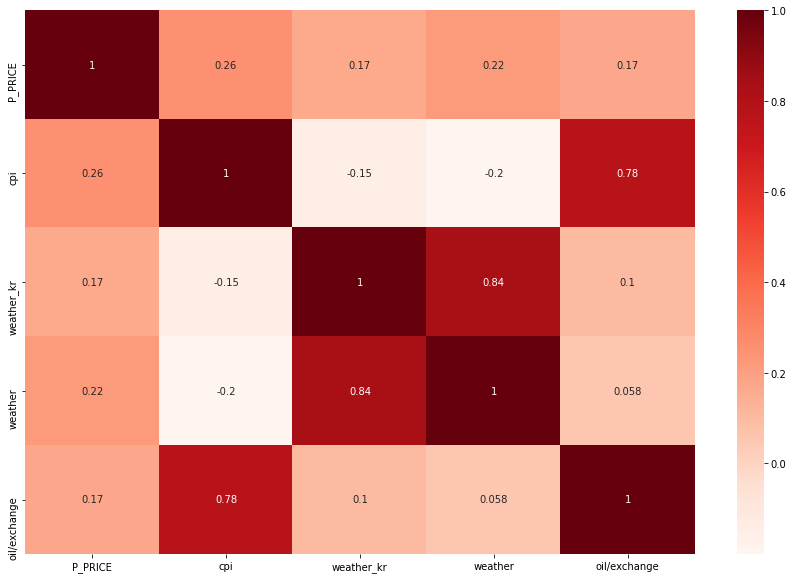

In [54]:
plt.figure(figsize=(15,10))

sns.heatmap(df_salmon_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_salmon_add1.values, i) for i in range(df_salmon_add1.shape[1])]
vif['features'] = df_salmon_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,22.466040,weather
1,37.326807,weather_kr
2,44.447942,oil/exchange
3,91.489680,P_PRICE
4,134.108980,cpi


In [56]:
import statsmodels.api as sm

X = df_salmon_add1.drop('P_PRICE',axis=1)
y = df_salmon_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     10.17
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.57e-07
Time:                        10:29:56   Log-Likelihood:                -399.09
No. Observations:                 210   AIC:                             808.2
Df Residuals:                     205   BIC:                             824.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.6315      6.675     -2.641   

Model Training Complete!


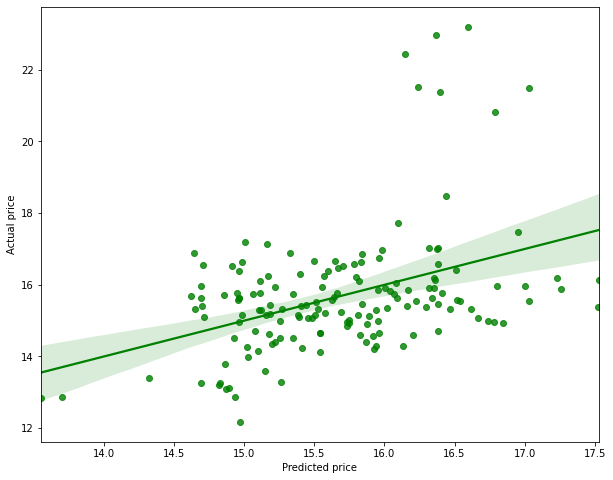

>> RMSE train = 1.5615140323451995
>> RMSE validation = 1.799126597339904
>> MAE train = 1.0833691936403682
>> MAE validation = 1.354213019945178
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
x_features = df_salmon_add1.drop('P_PRICE', axis=1)
y_target = df_salmon_add1['P_PRICE']

train_model(x_features,y_target)

기존의 변수들을 재조합하여 파생변수들을 생성하였지만 여전히 다중공선성 존재하고 p-value 값이 높은 변수가 존재한다는 한계 존재

### PCA

In [58]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)


In [59]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([4.99631574e-01, 4.27875522e-01, 3.50322993e-02, 1.69099770e-02,
       1.22892312e-02, 3.45373320e-03, 2.72012727e-03, 1.26673058e-03,
       8.20747028e-04, 5.83137387e-08])

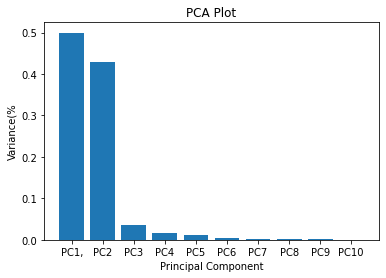

In [60]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


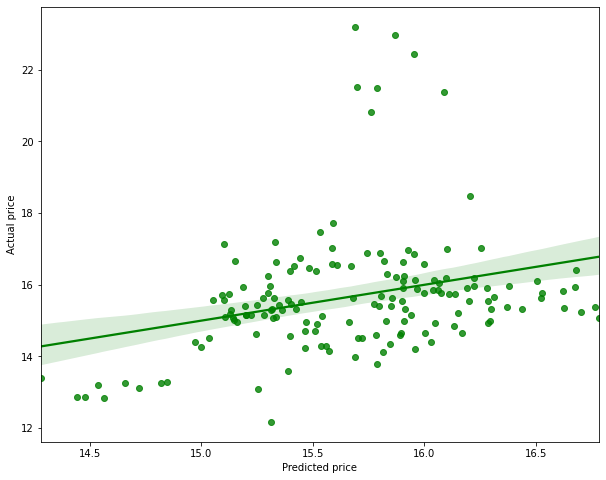

>> RMSE train = 1.6401777505918875
>> RMSE validation = 1.8830945683923939
>> MAE train = 1.0450694543564196
>> MAE validation = 1.373333748589184
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# 주성분 2개로 분석
x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

pca = PCA(n_components=2)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_salmon_add['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 PCA를 했음에도 모델 개선이 이뤄지지 않음.

최종 모델 : df_salmon_add

## Final Model

Model Training Complete!


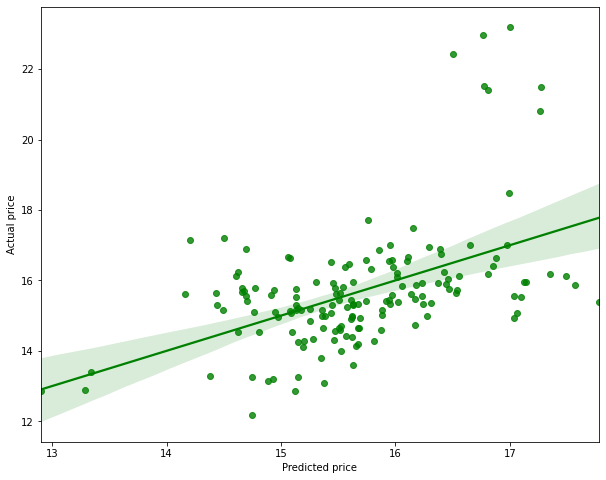

>> RMSE train = 1.4955606735721279
>> RMSE validation = 1.7255058340690708
>> MAE train = 1.0314734759254187
>> MAE validation = 1.2807946372890722
-------------------------------------------------


In [62]:
final_salmon = df_salmon_add

x_features = final_salmon.drop('P_PRICE', axis=1)
y_target = final_salmon['P_PRICE']


final_model_salmon = train_model(x_features,y_target)

# df_whiteleg_shrimp

In [64]:
df_whiteleg_shrimp = df0_base[(df0_base['P_NAME']=='흰다리새우') & ((df0_base['CTRY_2']=='베트남') | (df0_base['CTRY_2']=='태국'))]

df_whiteleg_shrimp = df_whiteleg_shrimp[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_whiteleg_shrimp

,CTRY_1,CTRY_2,P_PRICE,year,week
36,태국,태국,13.377047,2015,53
37,태국,태국,15.050566,2015,53
103,태국,태국,19.653302,2015,53
122,베트남,베트남,12.903215,2015,53
132,태국,태국,9.125593,2015,53
...,...,...,...,...,...
41932,베트남,베트남,13.953618,2020,1
41961,태국,태국,11.912033,2020,1
41980,태국,태국,11.500000,2020,1
42023,베트남,베트남,7.701577,2020,1


## Merge Features

In [65]:
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp, df_weather_kr, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_oil, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_cpi, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_whiteleg_shrimp_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,태국,태국,13.377047,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
1,태국,태국,13.377047,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.39,100.76,0.027700
2,태국,태국,15.050566,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
3,태국,태국,15.050566,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.39,100.76,0.027700
4,태국,태국,19.653302,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,태국,태국,11.500000,2020,1,6.534266,6.942657,13.188652,0.075000,3.000000,28.600000,61.66,105.79,118.44,0.033400
2149,베트남,베트남,7.701577,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.12,116.99,0.000043
2150,베트남,베트남,7.701577,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.79,118.44,0.000043
2151,베트남,베트남,8.353018,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.12,116.99,0.000043


## Filling Missing Value

In [66]:
df_whiteleg_shrimp_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [67]:
df_whiteleg_shrimp_add = df_whiteleg_shrimp_add.groupby(['year','week']).mean()

df_whiteleg_shrimp_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2015 53    12.010656  5.352941        7.973109  ...    100.305   101.010  0.012336
2016 1     10.246929  6.739496        6.356303  ...    100.390   100.760  0.010415
     2     11.736044  6.095798        5.514286  ...    100.390   100.760  0.013822
     3     10.435141  9.819643        0.268750  ...    100.390   100.760  0.012247
     4     10.350206  7.211224        4.908163  ...    100.390   100.760  0.015184
...              ...       ...             ...  ...        ...       ...       ...
2019 49    11.393362  7.260150        7.243609  ...    105.120   116.990  0.014691
     50    10.760669  6.208276       10.433793  ...    105.120   116.990  0.014691
     51    11.022549  6.806122        9.477551  ...    105.120   116.990  0.011062
     52    10.909145  6.362585        8.774830  ...    105.120   116.990  0.011062
2020 1     11.759048  6.534266        6.942657  ...    105.455   117.715  0.016722

[210 rows x 11 columns]

### Result

Model Training Complete!


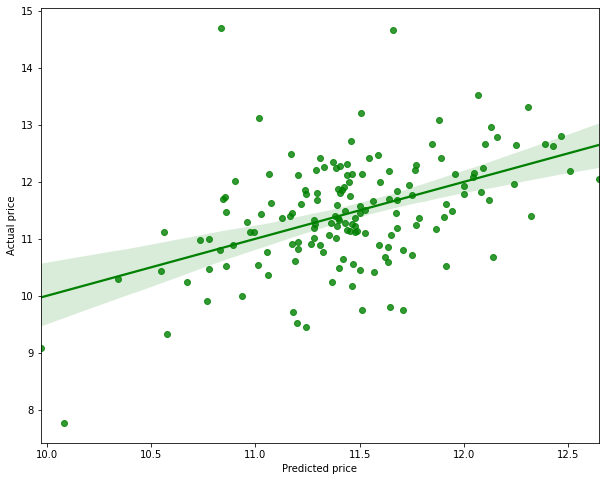

>> RMSE train = 0.8468280225787485
>> RMSE validation = 0.7971877984421889
>> MAE train = 0.6238266699837306
>> MAE validation = 0.5923569398695252
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
x_features = df_whiteleg_shrimp_add.drop('P_PRICE',axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

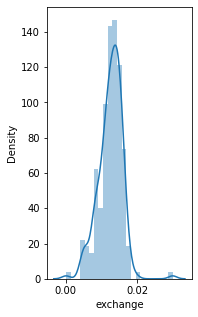

In [69]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'exchange':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(151)
    sns.distplot(df_whiteleg_shrimp_add[i])

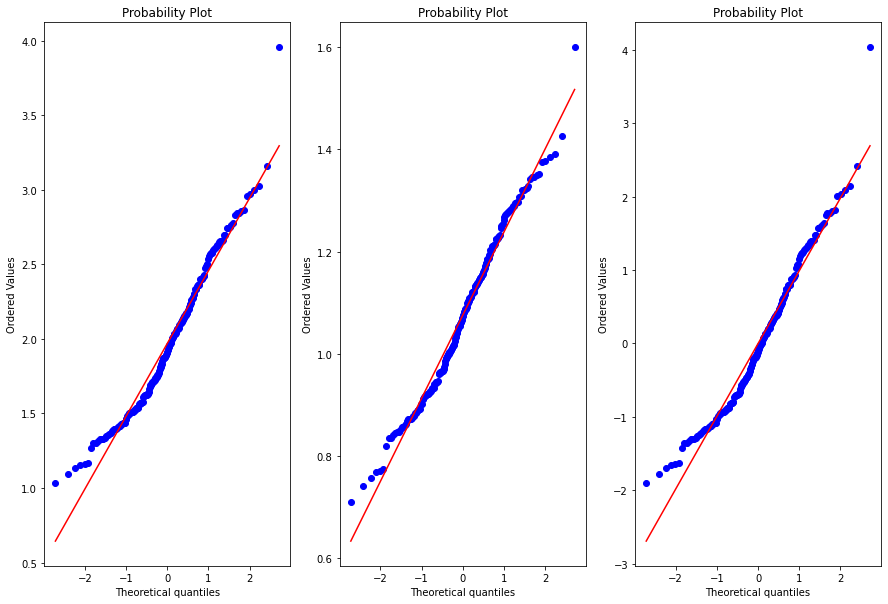

In [70]:
from scipy import stats 

fig = plt.figure(figsize = (15,10))

for i in columns:

  if i == 'wind':
    fig.add_subplot(131) 
    stats.probplot(df_whiteleg_shrimp_add[i],dist=stats.norm , plot=plt) 
    
    df_copy = df_whiteleg_shrimp_add.copy()
    df_copy[i] = np.log1p(df_copy[i])
    fig.add_subplot(132) 
    stats.probplot(df_copy[i], dist=stats.norm, plot=plt)
    
    df_copy1 = df_whiteleg_shrimp_add.copy()
    df_copy1[i] = (df_copy1[i] - df_copy1[i].mean()) / df_copy1[i].std()
    fig.add_subplot(133) 
    stats.probplot(df_copy1[i], dist=stats.norm, plot=plt)

데이터 표준화 실시

Model Training Complete!


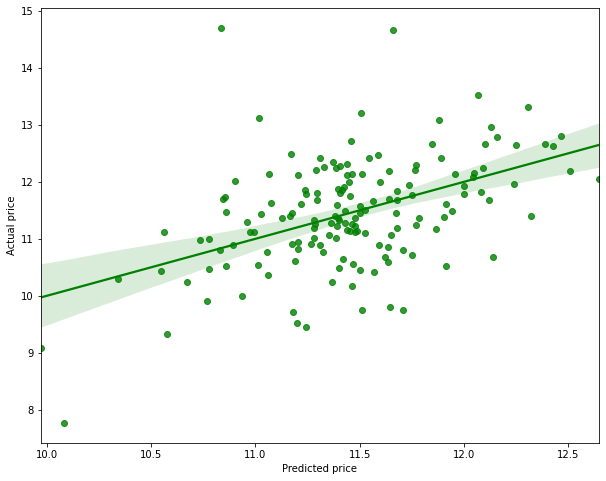

>> RMSE train = 0.8468280225787485
>> RMSE validation = 0.7971877984421758
>> MAE train = 0.6238266699837348
>> MAE validation = 0.5923569398695054
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

train_model(x_features,y_target)

## Feature Selection

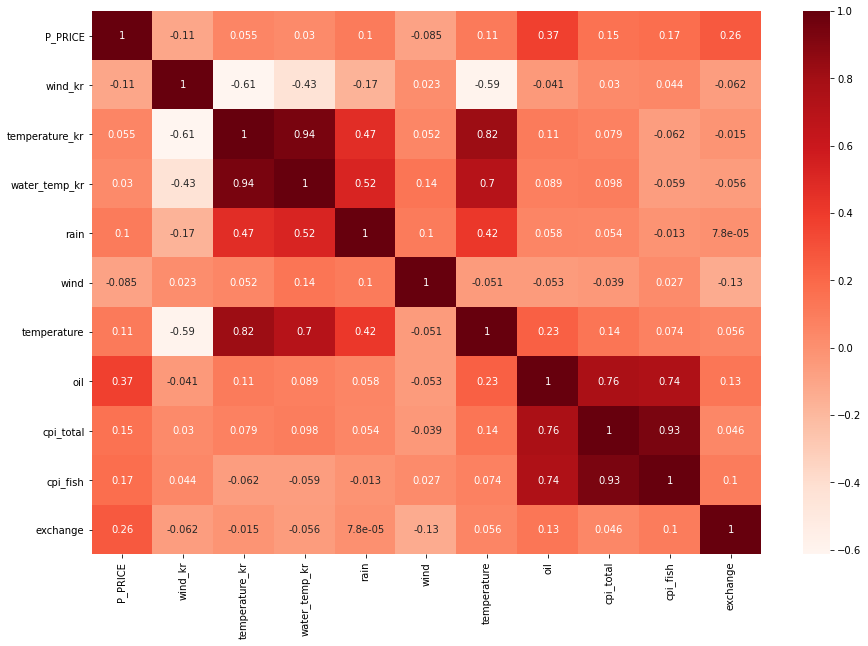

In [72]:
plt.figure(figsize=(15,10))

sns.heatmap(df_whiteleg_shrimp_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_whiteleg_shrimp_add.values, i) for i in range(df_whiteleg_shrimp_add.shape[1])]
vif['features'] = df_whiteleg_shrimp_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,6.772488,rain
1,16.805678,exchange
2,19.099199,wind
3,44.624224,wind_kr
4,82.545639,oil
5,112.412564,temperature_kr
6,154.113752,water_temp_kr
7,185.765671,P_PRICE
8,516.142142,temperature
9,3135.062117,cpi_fish


In [74]:
import statsmodels.api as sm

X = df_whiteleg_shrimp_add.drop('P_PRICE',axis=1)
y = df_whiteleg_shrimp_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     6.228
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           2.85e-08
Time:                        10:30:01   Log-Likelihood:                -257.59
No. Observations:                 210   AIC:                             537.2
Df Residuals:                     199   BIC:                             574.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.8248      9.295      2.

In [75]:
df_whiteleg_shrimp_add1 = df_whiteleg_shrimp_add.copy()

df_whiteleg_shrimp_add1['cpi'] = df_whiteleg_shrimp_add1['cpi_fish'] / df_whiteleg_shrimp_add1['cpi_total']
df_whiteleg_shrimp_add1['weather_kr'] = (df_whiteleg_shrimp_add1['water_temp_kr'] + df_whiteleg_shrimp_add1['temperature_kr']+df_whiteleg_shrimp_add1['wind_kr']) / 3
df_whiteleg_shrimp_add1['weather'] = (df_whiteleg_shrimp_add1['rain'] + df_whiteleg_shrimp_add1['temperature']+df_whiteleg_shrimp_add1['wind']) / 3
df_whiteleg_shrimp_add1['oil/exchange'] = df_whiteleg_shrimp_add1['oil'] / df_whiteleg_shrimp_add1['exchange']

df_whiteleg_shrimp_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

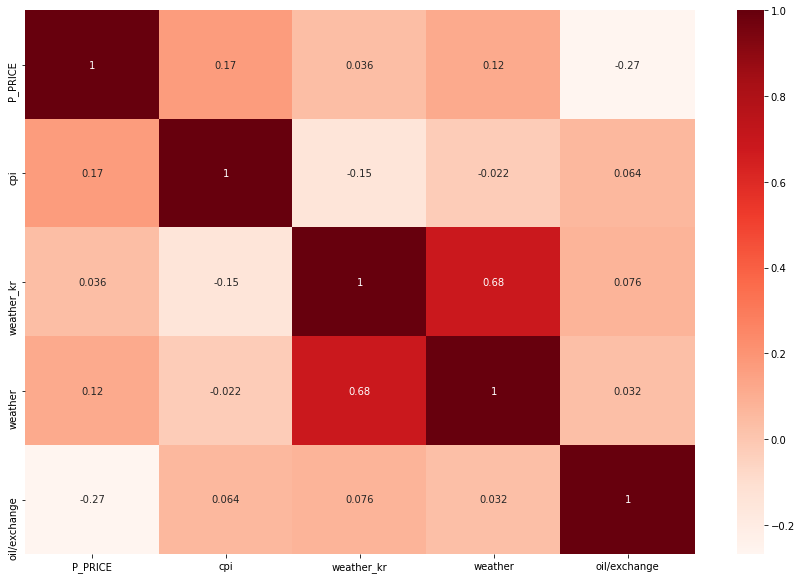

In [76]:
plt.figure(figsize=(15,10))

sns.heatmap(df_whiteleg_shrimp_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_whiteleg_shrimp_add1.values, i) for i in range(df_whiteleg_shrimp_add1.shape[1])]
vif['features'] = df_whiteleg_shrimp_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,1.120155,oil/exchange
1,21.205313,weather_kr
2,75.776371,weather
3,165.903673,P_PRICE
4,182.747709,cpi


In [78]:
import statsmodels.api as sm

X = df_whiteleg_shrimp_add1.drop('P_PRICE',axis=1)
y = df_whiteleg_shrimp_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     7.293
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           1.64e-05
Time:                        10:30:01   Log-Likelihood:                -272.21
No. Observations:                 210   AIC:                             554.4
Df Residuals:                     205   BIC:                             571.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7863      2.416      1.567   

Model Training Complete!


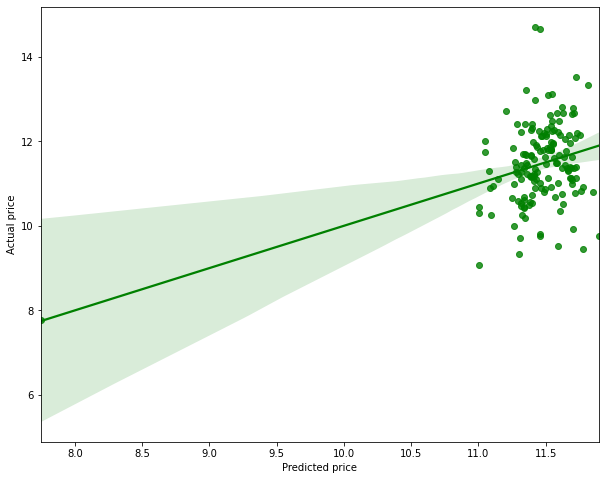

>> RMSE train = 0.8969966623429467
>> RMSE validation = 0.8578650811297541
>> MAE train = 0.6858709337821527
>> MAE validation = 0.7127159037790723
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
x_features = df_whiteleg_shrimp_add1.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add1['P_PRICE']

train_model(x_features,y_target)

기존의 변수들을 재조합하여 파생변수들을 생성하였지만 여전히 다중공선성 존재하고 p-value 값이 높은 변수가 존재한다는 한계 존재

### PCA

In [80]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)


In [81]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([4.83912340e-01, 3.90944495e-01, 6.68917263e-02, 3.43093771e-02,
       1.48366131e-02, 4.47327234e-03, 2.80735598e-03, 1.17732791e-03,
       6.47447789e-04, 4.47050231e-08])

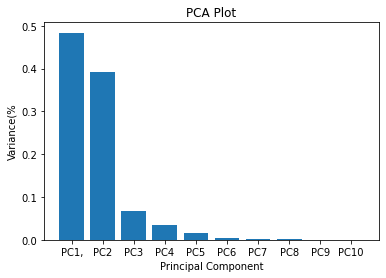

In [82]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


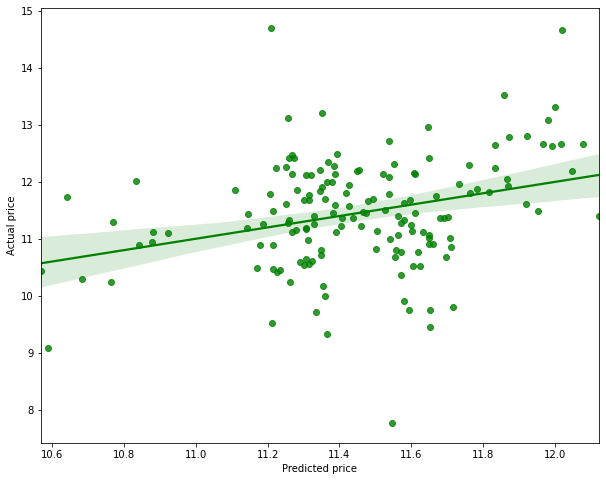

>> RMSE train = 0.915370980637474
>> RMSE validation = 0.7938812330386636
>> MAE train = 0.6830656611595519
>> MAE validation = 0.6624665752125743
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# 주성분 2개로 분석
x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

pca = PCA(n_components=2)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_whiteleg_shrimp_add['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 pca 진행하였음에도 모델 개선 x

최종 모델 : df_whiteleg_shrimp_add

## Final Model

Model Training Complete!


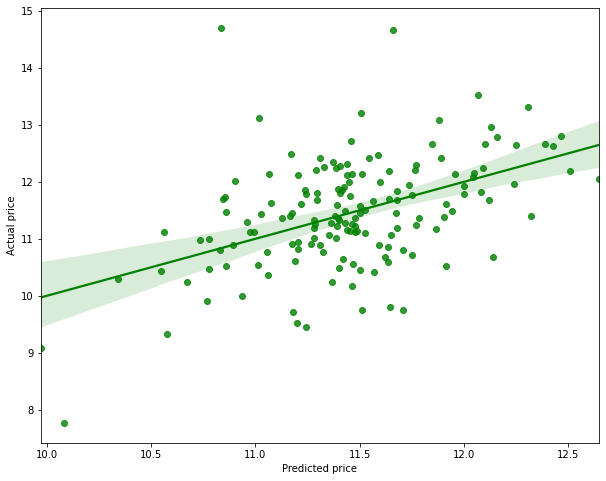

>> RMSE train = 0.8468280225787485
>> RMSE validation = 0.7971877984421889
>> MAE train = 0.6238266699837306
>> MAE validation = 0.5923569398695252
-------------------------------------------------


In [84]:
final_whiteleg_shrimp = df_whiteleg_shrimp_add

x_features = final_whiteleg_shrimp.drop('P_PRICE', axis=1)
y_target = final_whiteleg_shrimp['P_PRICE']


final_model_shrimp = train_model(x_features,y_target)

# Save

In [ ]:
final_squid.to_csv(os.path.join(root, "final_squid.csv"), encoding='utf-8', index=False)
final_salmon.to_csv(os.path.join(root, "final_salmon.csv"), encoding='utf-8', index=False)
final_whiteleg_shrimp.to_csv(os.path.join(root, "final_whiteleg_shrimp.csv"), encoding='utf-8', index=False)

# Best Model Selection

In [225]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [226]:
def model_scaler(data, col, scaler = None):
  
  '''
  정규화 함수
  data : dataframe
  column : P_PRICE
  scaler : standard, robust, minmax, log

  '''
 
  features = data.drop(col, axis=1)
  target = data[col]

  if scaler == 'standard':
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'robust':
    scaler = RobustScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'minmax':
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'log':
    features = np.log1p(features)

    return features, target

  elif scaler == 'None':

    return features, target


################################################################################################################################################

def model_train(data, col, scaler, model = None):

  '''
  
  data : dataframe
  column : P_PRICE
  scaler : standard, robust, minmax, log
  model_name : linear, ridge, lasso, elastic, decisiontree,
               randomforest, ada, gradient, xgb, lgbm

  '''

  features, target = model_scaler(data, col, scaler)
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
  
  if model == 'linear': 
    
    model = LinearRegression()
    neg_mse_scores = cross_val_score(model, features, target, scoring = 'neg_mean_squared_error', cv = 10)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)


    print('RMSE : {:.4f}'.format(avg_rmse))

  elif model == 'ridge':
    
    params = {
              'alpha': (0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1, 1, 10, 100, 200, 50, 30, 20, 29, 58),            
              'fit_intercept':(True, False),
              'normalize':(True, False),

              }

    ridge = Ridge(random_state=0)
    final = RandomizedSearchCV(ridge, param_distributions = params, cv = 5, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(x_train, y_train)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
    
  elif model == 'lasso':

    params = {
              'alpha': (0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1, 1, 10, 100, 200, 50, 30, 20, 29, 58),            
              'fit_intercept':(True, False),
              'normalize':(True, False),

              }

    lasso = Lasso(random_state=0)
    final = RandomizedSearchCV(lasso, param_distributions = params, cv = 5, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  
  elif model == 'elastic':
    

    params = {
       'alpha': (0.1, 0.01, 0.5, 1, 3, 5, 10),
       'l1_ratio':(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.1, 0.1)
    }

    elastic = ElasticNet()
    final = RandomizedSearchCV(elastic, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  elif model == 'decisiontree':
    
    params = {
              'max_depth': [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],            
               #'min_child_samples': randint(5, 50),
              'min_samples_split':[1,3,5,7,10,20,30,50,70,100],
              'min_samples_leaf': [1,3,5,7,10,20,30,50,70,100],
              
    }

    dt = DecisionTreeRegressor(random_state=0)
    final = RandomizedSearchCV(dt, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  elif model == 'randomforest':
    
    params = {
              'max_depth':  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],           
              'n_estimators':[1,5,10,30,50,70,100,200,500,1000],
               #'min_child_samples': randint(5, 50),
              'min_samples_leaf':[1,3,5,7,10,20,30,50,70,100],
              'min_samples_split': [1,3,5,7,10,20,30,50,70,100],
              'max_leaf_nodes': [1,3,5,7,10,20,30,50,70,100,200,500,700,1000],

              }

    rf = RandomForestRegressor(random_state=0)
    final = RandomizedSearchCV(rf, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))


  elif model == 'gradinet':

    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'subsample' : (0.01, 0.1, 0.5, 0.08, 0.35, 0.3, 0.001, 0.03, 0.006, 0.153, 0.193, 0.0012, 0.0083 ,1),
              'min_samples_split' : [1,3,5,7,10,20,30,50,70,100],
              'max_depth' : [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              }   

    grad = GradientBoostingRegressor()
    final = RandomizedSearchCV(grad, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

  elif model == 'xgb':
    
    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }   

    xgb = XGBRegressor()
    final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)

    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

  elif model == 'lgbm':
    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' : [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' : [1,3,5,7,9,15,25,50,100,200,300,500,700],
              'num_leaves': [1,3,5,7,9,15,25,50,100,200,300,500,700],
              'min_child_samples':[1,3,5,7,9,15,25,50,100,200,300,500,700],  
              }   

    lgbm = LGBMRegressor()
    final = RandomizedSearchCV(lgbm, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)

    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

## Squid

In [227]:
model_train(final_squid,'P_PRICE','None','linear')

RMSE : 0.5724


In [228]:
model_train(final_squid,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.351}
Best Score: 0.5859289965905945
Predict RMSE: 0.5524588433923221


In [229]:
model_train(final_squid,'P_PRICE','None','lasso')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.001}
Best Score: 0.6123308641764589
Predict RMSE: 0.5228437128480582


In [230]:
model_train(final_squid,'P_PRICE','None','elastic')

Best Params: {'l1_ratio': 0.0001, 'alpha': 0.01}
Best Score: 0.6372244482790091
Predict RMSE: 0.5335468080801968


In [231]:
model_train(final_squid,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_leaf_nodes': 700, 'max_depth': 300}
Best Score: 0.6342090239389403
Predict RMSE: 0.43055317543955374


In [232]:
model_train(final_squid,'P_PRICE','None','gradinet')

Best Params: {'subsample': 0.3, 'n_estimators': 30, 'min_samples_split': 50, 'max_depth': 5, 'learning_rate': 0.185}
Best Score: 0.6171302774342369
Predict RMSE: 0.46897308595276355


In [233]:
model_train(final_squid,'P_PRICE','None','xgb')

[11:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.012385}
Best Score: 0.6367346528556361
Predict RMSE: 0.15149053113676744


In [234]:
model_train(final_squid,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 25, 'n_estimators': 1000, 'min_child_weight': 5, 'min_child_samples': 15, 'max_depth': 700, 'learning_rate': 0.003}
Best Score: 0.6240335757370186
Predict RMSE: 0.3929142128685041


## Salmon

In [235]:
model_train(final_salmon,'P_PRICE','None','linear')

RMSE : 1.9248


In [236]:
model_train(final_salmon,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': False, 'alpha': 200}
Best Score: 1.5796885925631083
Predict RMSE: 1.8914732304938502


In [237]:
model_train(final_salmon,'P_PRICE','None','lasso')

Best Params: {'normalize': True, 'fit_intercept': False, 'alpha': 30}
Best Score: 1.9022919987104885
Predict RMSE: 1.8987916714617261


In [238]:
model_train(final_salmon,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 30, 'min_samples_split': 30, 'min_samples_leaf': 100, 'max_leaf_nodes': 70, 'max_depth': 700}
Best Score: 1.875917204042113
Predict RMSE: 2.035918070400605


In [239]:
model_train(final_salmon,'P_PRICE','None','gradinet')

Best Params: {'subsample': 1, 'n_estimators': 5, 'min_samples_split': 30, 'max_depth': 1000, 'learning_rate': 0.1}
Best Score: 1.828418766342448
Predict RMSE: 1.5108083816532067


In [240]:
model_train(final_salmon,'P_PRICE','None','xgb')

[11:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 1000, 'min_child_weight': 15, 'max_depth': 5, 'learning_rate': 0.04}
Best Score: 1.845433989878406
Predict RMSE: 0.07023890420893603


In [241]:
model_train(final_salmon,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 100, 'n_estimators': 50, 'min_child_weight': 15, 'min_child_samples': 5, 'max_depth': 15, 'learning_rate': 0.096}
Best Score: 1.816409890821
Predict RMSE: 0.5480443350904356


## Whiteleg_shrimp

In [242]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','linear')

RMSE : 0.9400


In [243]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.1}
Best Score: 0.900221148250888
Predict RMSE: 0.7777347551473796


In [244]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','lasso')

Best Params: {'normalize': False, 'fit_intercept': True, 'alpha': 0.5}
Best Score: 0.9544444213422493
Predict RMSE: 0.7647685048310465


In [245]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 200, 'max_depth': 100}
Best Score: 0.8754006905573869
Predict RMSE: 0.4416088597844314


In [246]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','gradinet')

Best Params: {'subsample': 1, 'n_estimators': 5, 'min_samples_split': 30, 'max_depth': 1000, 'learning_rate': 0.1}
Best Score: 0.8946200034573782
Predict RMSE: 0.6248537947949422


In [247]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','xgb')

[11:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.012385}
Best Score: 0.9276051217368521
Predict RMSE: 0.18889824090474988


In [248]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 700, 'n_estimators': 200, 'min_child_weight': 1, 'min_child_samples': 25, 'max_depth': 3, 'learning_rate': 0.008}
Best Score: 0.9171722358443072
Predict RMSE: 0.6564510796236956


## Best Model

### Squid

In [ ]:
 params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }
xgb = XGBRegressor()
squid_final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)

features = final_squid.drop('P_PRICE',axis=1)
target = final_squid['P_PRICE']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

squid_final.fit(features, target)

### Salmon

In [ ]:
 params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }   

xgb = XGBRegressor()
salmon_final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
features = final_salmon.drop('P_PRICE',axis=1)
target = final_salmon['P_PRICE']
salmon_final.fit(features, target)

### Whiteleg Shrimp

In [ ]:
 params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }   

xgb = XGBRegressor()
whiteleg_shrimp_final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
features = final_whiteleg_shrimp.drop('P_PRICE',axis=1)
target = final_whiteleg_shrimp['P_PRICE']
whiteleg_shrimp_final.fit(features, target)

# Validation

## Validation Data

### Import Data

In [300]:
df_test = pd.read_excel(os.path.join(root, 'test.xlsx'))

### Preprocessing

In [301]:
set_week(df_test, 'REG_DATE')

In [302]:
def check_week(df):
    '''
    df에 date가 전부 있는지 확인
    '''
    cnt = 0
    sdate = date(2020, 1, 6)   # start date
    edate = date(2020, 12, 28)   # end date
    delta = edate - sdate       # as timedelta
    mem = set()
    
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        year, week = day.isocalendar()[0], day.isocalendar()[1]
        if year * 100 + week in mem:
          continue
        mem.add(year * 100 + week)
        if df[(df['year'] == year) & (df['week'] == week)].empty:
          print((year, week), end="")
          cnt += 1
    if cnt > 0:
        print()
    print("missing", cnt, "values")    

In [303]:
check_week(df_test)

missing 0 values


#### Squid

In [304]:
df_test_squid = df_test[(df_test['P_NAME']=='오징어') & ((df_test['CTRY_2']=='페루') | (df_test['CTRY_2']=='중국') | (df_test['CTRY_2']=='칠레'))]

df_test_squid = df_test_squid[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_squid

,CTRY_1,CTRY_2,P_PRICE,year,week
15,중국,중국,2.706303,2020,2
16,중국,중국,1.940000,2020,2
39,페루,칠레,2.195883,2020,2
40,페루,칠레,1.922647,2020,2
41,페루,페루,2.855495,2020,2
...,...,...,...,...,...
9421,페루,페루,2.160000,2020,53
9422,페루,페루,2.910000,2020,53
9428,페루,페루,1.330000,2020,53
9433,중국,중국,2.090000,2020,53


##### Merge Features

In [305]:
df_test_squid_add = pd.merge(df_test_squid, df_weather_kr, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_squid_add = pd.merge(df_test_squid_add, df_oil, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_cpi, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_squid_add = df_test_squid_add.sort_values('CTRY_2')

df_test_squid_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,중국,중국,2.706303,2020,2,7.867857,8.473571,12.859854,2.332272,2.422505,-0.42017,60.836,105.79,118.44,0.1433
291,중국,중국,4.066718,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
290,중국,중국,3.852694,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
289,중국,중국,1.933681,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
286,중국,중국,1.455000,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,페루,페루,2.115951,2020,5,7.460000,7.672143,11.654676,NaN,NaN,NaN,52.730,105.80,119.49,0.2999
464,페루,페루,2.489640,2020,40,4.302041,21.297279,22.272109,NaN,NaN,NaN,39.176,106.20,119.06,0.2785
465,페루,페루,2.489640,2020,40,4.302041,21.297279,22.272109,NaN,NaN,NaN,39.176,105.61,120.00,0.2785
60,페루,페루,2.130480,2020,6,7.084828,4.409091,11.387413,NaN,NaN,NaN,50.348,105.80,119.49,0.2963


##### Filling Missing Values

In [306]:
df_test_squid_add.isna().sum() # 페루 날씨 데이터 결측값 존재

CTRY_1              0
CTRY_2              0
P_PRICE             0
year                0
week                0
wind_kr             0
temperature_kr      0
water_temp_kr       0
rain              290
wind              290
temperature       290
oil                 0
cpi_total           0
cpi_fish            0
exchange            0
dtype: int64

In [307]:
df_test_squid_add.fillna(method='ffill',inplace=True)  # 가까운 나라인 칠레 데이터로 대체

In [308]:
df_test_squid_add.isna().sum() # 결측값 처리 완료

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [309]:
df_test_squid_add = df_test_squid_add.groupby(['year','week']).mean()

df_test_squid_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                      ...                               
2020 2     2.694026  7.867857        8.473571  ...    105.790   118.440  0.137910
     3     2.799003  6.480420        5.767832  ...    105.790   118.440  0.173614
     4     2.820781  6.940714        8.267857  ...    105.790   118.440  0.149049
     5     2.573288  7.460000        7.672143  ...    105.795   118.965  0.179170
     6     2.749292  7.084828        4.409091  ...    105.800   119.490  0.257825
     7     3.181970  6.048299        9.512329  ...    105.800   119.490  0.294600
     8     2.915586  6.817687        6.871429  ...    105.800   119.490  0.265280
     9     2.421211  6.518571        9.256115  ...    105.670   119.345  0.162456
     10    3.069136  6.115646        7.713699  ...    105.540   119.200  0.202963
     11    2.733139  7.688060        8.681955  ...    105.540   119.200  0.181779
     12    2.741034  6.956061       10.062121  ...    105.540   119.200  0.141757
     13    2.356233  6.333333       10.496032  ...    105.540   119.200  0.121584
     14    1.916776  6.220000       10.429771  ...    105.245   119.830  0.108282
     15    2.827398  5.535036       10.595588  ...    104.950   120.460  0.107728
     16    2.478963  5.881379       12.058741  ...    104.950   120.460  0.127328
     17    2.360139  7.776871       11.469388  ...    104.950   120.460  0.144980
     18    2.324205  5.254422       14.334247  ...    104.830   120.640  0.102957
     19    2.914349  5.846259       14.760544  ...    104.710   120.820  0.132115
     20    2.769251  4.636054       15.401361  ...    104.710   120.820  0.157785
     21    2.554303  5.512500       15.381690  ...    104.710   120.820  0.143742
     22    2.896299  3.394444       16.806164  ...    104.710   120.820  0.156922
     23    2.349213  3.756250       18.425694  ...    104.870   120.400  0.127664
     24    2.593165  4.043571       20.580714  ...    104.870   120.400  0.155039
     25    2.325860  4.182857       20.410714  ...    104.870   120.400  0.129512
     26    2.684748  4.015603       21.422857  ...    104.870   120.400  0.099416
     27    2.451304  5.076429       20.379286  ...    104.865   119.810  0.127604
     28    2.660586  4.008759       21.481955  ...    104.860   119.220  0.152781
     29    3.086476  5.381119       21.569853  ...    104.860   119.220  0.143289
     30    2.492329  5.104861       22.322143  ...    104.860   119.220  0.127446
     31    2.644042  3.837410       23.547482  ...    105.180   118.760  0.166417
     32    3.090630  6.268148       24.638971  ...    105.500   118.300  0.163958
     33    2.678793  5.369697       25.393130  ...    105.500   118.300  0.184571
     34    2.635599  3.171233       26.155172  ...    105.500   118.300  0.166619
     35    2.327621  5.550350       26.476812  ...    105.500   118.300  0.155252
     36    2.408983  7.022727       24.467969  ...    105.850   118.680  0.175420
     37    2.575534  6.455039       22.891200  ...    106.200   119.060  0.170967
     38    2.559725  3.923077       22.645455  ...    106.200   119.060  0.167938
     39    2.543923  6.810274       21.593151  ...    106.200   119.060  0.189565
     40    2.177672  4.302041       21.297279  ...    105.905   119.530  0.155822
     41    2.556555  7.609524       19.286395  ...    105.610   120.000  0.187734
     42    2.289809  5.853175       18.267200  ...    105.610   120.000  0.188411
     43    4.139414  6.592063       17.050394  ...    105.610   120.000  0.204674
     44    2.780823  5.188028       17.138462  ...    105.555   120.555  0.248789
     45    2.626703  6.141259       14.879433  ...    105.500   121.110  0.181215
     46    2.673890  4.904965       14.696552  ...    105.500   121.110  0.202393
     47    2.441362  7.466429       15.306803  ...    105.500   121.110  0.190701
     48    2.663866  7.173188       10.026207  ...    105.500   121.110  0.2

##### Final Test DF

In [310]:
final_test_squid = df_test_squid_add

#### Salmon

In [311]:
df_test_salmon = df_test[(df_test['P_NAME']=='연어') & (df_test['CTRY_2']=='노르웨이')]

df_test_salmon = df_test_salmon[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_salmon

,CTRY_1,CTRY_2,P_PRICE,year,week
37,노르웨이,노르웨이,28.500000,2020,2
94,노르웨이,노르웨이,12.199457,2020,2
195,노르웨이,노르웨이,16.335035,2020,2
196,노르웨이,노르웨이,14.756580,2020,2
215,노르웨이,노르웨이,13.170679,2020,2
...,...,...,...,...,...
9435,노르웨이,노르웨이,8.750000,2020,53
9448,노르웨이,노르웨이,29.740000,2020,53
9459,노르웨이,노르웨이,15.290000,2020,53
9471,노르웨이,노르웨이,14.260000,2020,53


##### Merge Features

In [312]:
df_test_salmon_add = pd.merge(df_test_salmon, df_weather_kr, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_oil, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_cpi, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_salmon_add = df_test_salmon_add.sort_values(['year','week'])

df_test_salmon_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,노르웨이,노르웨이,28.500000,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
1,노르웨이,노르웨이,12.199457,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
2,노르웨이,노르웨이,16.335035,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
3,노르웨이,노르웨이,14.756580,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
4,노르웨이,노르웨이,13.170679,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,노르웨이,노르웨이,15.290000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,106.47,121.92,0.1158
382,노르웨이,노르웨이,14.260000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,105.67,121.80,0.1158
383,노르웨이,노르웨이,14.260000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,106.47,121.92,0.1158
384,노르웨이,노르웨이,8.590000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,105.67,121.80,0.1158


##### Filling Missing Values

In [313]:
df_test_salmon_add.isna().sum() # 결측값 존재

CTRY_1              0
CTRY_2              0
P_PRICE             0
year                0
week                0
wind_kr             0
temperature_kr      0
water_temp_kr       0
rain              232
wind              232
temperature       232
oil                 0
cpi_total           0
cpi_fish            0
exchange            0
dtype: int64

In [314]:
df_test_salmon_add.fillna(method='ffill',inplace=True) # 전주 값으로 대체

In [315]:
df_test_salmon_add.isna().sum() # 결측값 처리 완료

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [316]:
df_test_salmon_add = df_test_salmon_add.groupby(['year','week']).mean()

df_test_salmon_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2020 2     16.992350  7.867857        8.473571  ...    105.790   118.440    0.1137
     3     17.340328  6.480420        5.767832  ...    105.790   118.440    0.1124
     4     15.587532  6.940714        8.267857  ...    105.790   118.440    0.1120
     5     16.892669  7.460000        7.672143  ...    105.795   118.965    0.1094
     6     15.975454  7.084828        4.409091  ...    105.800   119.490    0.1077
     7     15.170032  6.048299        9.512329  ...    105.800   119.490    0.1076
     8     15.080865  6.817687        6.871429  ...    105.800   119.490    0.1080
     9     15.723319  6.518571        9.256115  ...    105.670   119.345    0.1068
     10    15.735015  6.115646        7.713699  ...    105.540   119.200    0.1076
     11    15.187748  7.688060        8.681955  ...    105.540   119.200    0.1044
     12    15.017789  6.956061       10.062121  ...    105.540   119.200    0.0973
     13    14.675168  6.333333       10.496032  ...    105.540   119.200    0.0862
     14    14.396876  6.220000       10.429771  ...    105.245   119.830    0.0948
     15    15.218819  5.535036       10.595588  ...    104.950   120.460    0.0958
     16    12.040515  5.881379       12.058741  ...    104.950   120.460    0.0966
     17    14.279194  7.776871       11.469388  ...    104.950   120.460    0.0955
     18    13.881676  5.254422       14.334247  ...    104.830   120.640    0.0951
     19    13.452220  5.846259       14.760544  ...    104.710   120.820    0.0967
     20    13.567672  4.636054       15.401361  ...    104.710   120.820    0.0968
     21    14.117930  5.512500       15.381690  ...    104.710   120.820    0.0997
     22    14.430410  3.394444       16.806164  ...    104.710   120.820    0.0994
     23    15.218256  3.756250       18.425694  ...    104.870   120.400    0.1039
     24    15.704652  4.043571       20.580714  ...    104.870   120.400    0.1080
     25    15.732229  4.182857       20.410714  ...    104.870   120.400    0.1048
     26    14.820120  4.015603       21.422857  ...    104.870   120.400    0.1041
     27    14.637310  5.076429       20.379286  ...    104.865   119.810    0.1033
     28    14.746793  4.008759       21.481955  ...    104.860   119.220    0.1064
     29    14.494195  5.381119       21.569853  ...    104.860   119.220    0.1059
     30    14.202351  5.104861       22.322143  ...    104.860   119.220    0.1084
     31    15.263169  3.837410       23.547482  ...    105.180   118.760    0.1099
     32    14.266385  6.268148       24.638971  ...    105.500   118.300    0.1095
     33    14.027953  5.369697       25.393130  ...    105.500   118.300    0.1106
     34    14.434727  3.171233       26.155172  ...    105.500   118.300    0.1129
     35    14.297317  5.550350       26.476812  ...    105.500   118.300    0.1111
     36    14.017716  7.022727       24.467969  ...    105.850   118.680    0.1146
     37    14.295397  6.455039       22.891200  ...    106.200   119.060    0.1119
     38    14.276205  3.923077       22.645455  ...    106.200   119.060    0.1107
     39    14.575858  6.810274       21.593151  ...    106.200   119.060    0.1077
     40    15.085690  4.302041       21.297279  ...    105.905   119.530    0.1054
     41    14.927119  7.609524       19.286395  ...    105.610   120.000    0.1085
     42    14.598102  5.853175       18.267200  ...    105.610   120.000    0.1094
     43    14.698816  6.592063       17.050394  ...    105.610   120.000    0.1072
     44    19.295902  5.188028       17.138462  ...    105.555   120.555    0.1082
     45    14.480638  6.141259       14.879433  ...    105.500   121.110    0.1046
     46    14.481199  4.904965       14.696552  ...    105.500   121.110    0.1105
     47    14.269818  7.466429       15.306803  ...    105.500   121.110    0.1104
     48    14.583272  7.17318

##### Final Test DF

In [317]:
final_test_salmon = df_test_salmon_add

#### Whiteleg Shrimp

In [318]:
df_test_whiteleg_shrimp = df_test[(df_test['P_NAME']=='흰다리새우') & ((df_test['CTRY_2']=='베트남') | (df_test['CTRY_2']=='태국'))]

df_test_whiteleg_shrimp = df_test_whiteleg_shrimp[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_whiteleg_shrimp

,CTRY_1,CTRY_2,P_PRICE,year,week
51,태국,태국,11.519824,2020,2
52,태국,태국,8.056061,2020,2
64,베트남,베트남,9.690003,2020,2
65,베트남,베트남,8.013686,2020,2
99,태국,태국,15.130751,2020,2
...,...,...,...,...,...
9397,베트남,베트남,7.830000,2020,53
9398,베트남,베트남,16.770000,2020,53
9415,태국,태국,21.040000,2020,53
9423,태국,태국,9.620000,2020,53


##### Merge Features

In [319]:
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp, df_weather_kr, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_oil, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_cpi, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_whiteleg_shrimp_add = df_test_whiteleg_shrimp_add.sort_values(['year','week'])

df_test_whiteleg_shrimp_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,태국,태국,11.519824,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
1,태국,태국,8.056061,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
2,베트남,베트남,9.690003,2020,2,7.867857,8.473571,12.859854,0.644828,1.931034,22.303448,60.836,105.79,118.44,0.000043
3,베트남,베트남,8.013686,2020,2,7.867857,8.473571,12.859854,0.644828,1.931034,22.303448,60.836,105.79,118.44,0.000043
4,태국,태국,15.130751,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,태국,태국,21.040000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,106.47,121.92,0.033100
409,태국,태국,9.620000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,105.67,121.80,0.033100
410,태국,태국,9.620000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,106.47,121.92,0.033100
411,베트남,베트남,7.410000,2020,53,8.074658,4.307194,12.841781,0.566667,3.000000,20.553333,48.135,105.67,121.80,0.000043


##### Filling Missing Values

In [320]:
df_test_whiteleg_shrimp_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [321]:
df_test_whiteleg_shrimp_add = df_test_whiteleg_shrimp_add.groupby(['year','week']).mean()

df_test_whiteleg_shrimp_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2020 2      9.902466  7.867857        8.473571  ...    105.790   118.440  0.012439
     3      9.595764  6.480420        5.767832  ...    105.790   118.440  0.008307
     4      9.313120  6.940714        8.267857  ...    105.790   118.440  0.004737
     5     10.731888  7.460000        7.672143  ...    105.795   118.965  0.012214
     6     11.815052  7.084828        4.409091  ...    105.800   119.490  0.010762
     7     11.837182  6.048299        9.512329  ...    105.800   119.490  0.015971
     8      9.060699  6.817687        6.871429  ...    105.800   119.490  0.006454
     9     10.900109  6.518571        9.256115  ...    105.670   119.345  0.015822
     10    11.752713  6.115646        7.713699  ...    105.540   119.200  0.005319
     11    13.278888  7.688060        8.681955  ...    105.540   119.200  0.010629
     12    12.167508  6.956061       10.062121  ...    105.540   119.200  0.007807
     13    12.074429  6.333333       10.496032  ...    105.540   119.200  0.015271
     14    11.699113  6.220000       10.429771  ...    105.245   119.830  0.015321
     15    12.336940  5.535036       10.595588  ...    104.950   120.460  0.013096
     16    12.885259  5.881379       12.058741  ...    104.950   120.460  0.013139
     17    10.531373  7.776871       11.469388  ...    104.950   120.460  0.015421
     18    12.741518  5.254422       14.334247  ...    104.830   120.640  0.013224
     19    10.975996  5.846259       14.760544  ...    104.710   120.820  0.015471
     20    12.433387  4.636054       15.401361  ...    104.710   120.820  0.013310
     21    12.992849  5.512500       15.381690  ...    104.710   120.820  0.013396
     22    12.863254  3.394444       16.806164  ...    104.710   120.820  0.012546
     23    12.298451  3.756250       18.425694  ...    104.870   120.400  0.015821
     24    11.462716  4.043571       20.580714  ...    104.870   120.400  0.010629
     25    11.543317  4.182857       20.410714  ...    104.870   120.400  0.014335
     26     9.772050  4.015603       21.422857  ...    104.870   120.400  0.009259
     27    11.568231  5.076429       20.379286  ...    104.865   119.810  0.018533
     28    13.310962  4.008759       21.481955  ...    104.860   119.220  0.012866
     29    11.317738  5.381119       21.569853  ...    104.860   119.220  0.009117
     30    10.571139  5.104861       22.322143  ...    104.860   119.220  0.011802
     31    11.521077  3.837410       23.547482  ...    105.180   118.760  0.010629
     32    10.593069  6.268148       24.638971  ...    105.500   118.300  0.013739
     33    11.227565  5.369697       25.393130  ...    105.500   118.300  0.013782
     34    10.196777  3.171233       26.155172  ...    105.500   118.300  0.013782
     35    11.652322  5.550350       26.476812  ...    105.500   118.300  0.009088
     36    11.038631  7.022727       24.467969  ...    105.850   118.680  0.016122
     37    11.637289  6.455039       22.891200  ...    106.200   119.060  0.021281
     38    10.616361  3.923077       22.645455  ...    106.200   119.060  0.014202
     39    12.426220  6.810274       21.593151  ...    106.200   119.060  0.013696
     40    10.879439  4.302041       21.297279  ...    105.905   119.530  0.015822
     41    11.382807  7.609524       19.286395  ...    105.610   120.000  0.015972
     42    11.968719  5.853175       18.267200  ...    105.610   120.000  0.013782
     43    10.888223  6.592063       17.050394  ...    105.610   120.000  0.016022
     44    11.467702  5.188028       17.138462  ...    105.555   120.555  0.014246
     45    12.732091  6.141259       14.879433  ...    105.500   121.110  0.013782
     46     9.438308  4.904965       14.696552  ...    105.500   121.110  0.013106
     47    11.865793  7.466429       15.306803  ...    105.500   121.110  0.016572
     48    12.399499  7.17318

##### Final Test DF

In [322]:
final_test_whiteleg_shrimp = df_test_whiteleg_shrimp_add

## evaluation

### Squid

In [323]:
squid_test_features = final_test_squid.drop('P_PRICE',axis=1)
squid_test_target = final_test_squid['P_PRICE']

pred = squid_final.predict(squid_test_features)

print('Best Params:', squid_final.best_params_)
print('Best Score:', np.sqrt(-1 *squid_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(squid_test_target, pred))))

Best Params: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.012385}
Best Score: 0.6367346528556361
Predict RMSE: 0.7920562297578321


### Salmon

In [324]:
salmon_test_features = final_test_salmon.drop('P_PRICE',axis=1)
salmon_test_target = final_test_salmon['P_PRICE']

pred = squid_final.predict(salmon_test_features)

print('Best Params:', salmon_final.best_params_)
print('Best Score:', np.sqrt(-1 *salmon_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(salmon_test_target, pred))))

Best Params: {'n_estimators': 1000, 'min_child_weight': 15, 'max_depth': 5, 'learning_rate': 0.04}
Best Score: 1.845433989878406
Predict RMSE: 11.068565010643594


### Whiteleg Shrimp

In [325]:
whiteleg_shrimp_test_features = final_test_whiteleg_shrimp.drop('P_PRICE',axis=1)
whiteleg_shrimp_test_target = final_test_whiteleg_shrimp['P_PRICE']

pred = squid_final.predict(whiteleg_shrimp_test_features)

print('Best Params:', whiteleg_shrimp_final.best_params_)
print('Best Score:', np.sqrt(-1 *whiteleg_shrimp_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(whiteleg_shrimp_test_target, pred))))

Best Params: {'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.012385}
Best Score: 0.9276051217368521
Predict RMSE: 8.789819059733743
